In [1]:
# Getting the input + visualization #

In [2]:
import librosa as lr
import librosa.display as lrd
import matplotlib.pyplot as plt
import getInput

template,target = getInput.userInput()

TEMPLATE_FILE ="assets/"+template
TARGET_FILE = "assets/"+target
SAMPLING_RATE = 44000
FIG_DIMENSION = (14, 7)

In [3]:
template_data, template_sr = lr.load(TEMPLATE_FILE, sr=SAMPLING_RATE)
target_data, target_sr = lr.load(TARGET_FILE, sr=SAMPLING_RATE)

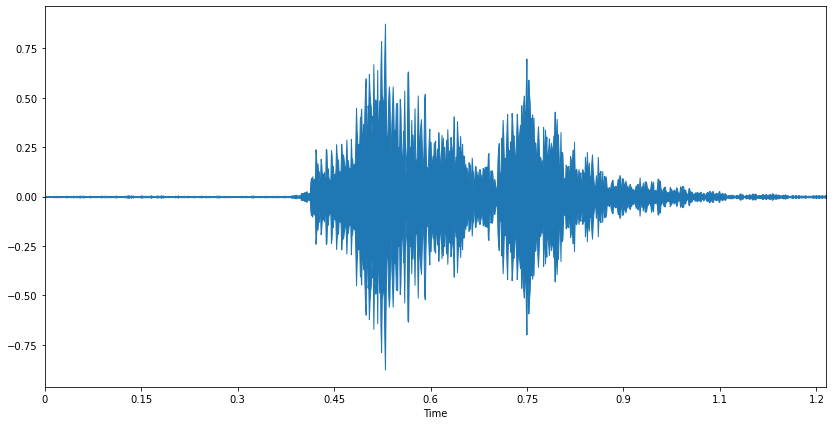

In [4]:
plt.figure(figsize=FIG_DIMENSION)
lrd.waveplot(template_data, sr=SAMPLING_RATE)

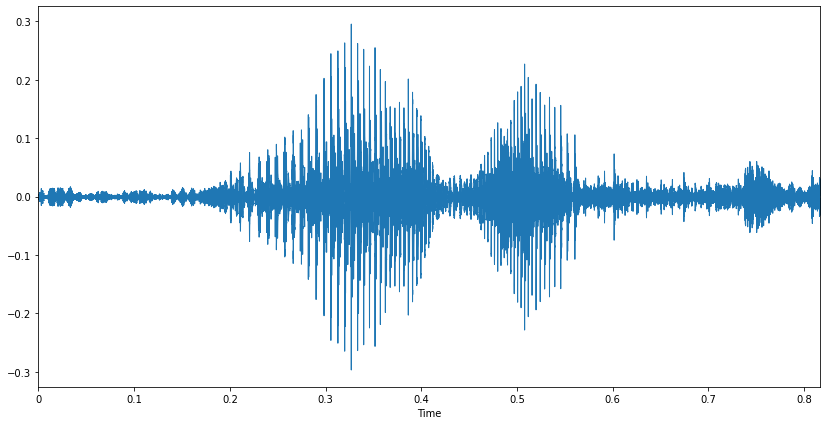

In [5]:
plt.figure(figsize=FIG_DIMENSION)
lrd.waveplot(target_data, sr=SAMPLING_RATE)

In [6]:
# Data pre-processing #

In [7]:
from librosa.effects import preemphasis, trim
from preprocess import noise_gating
THRESHOLD = 0.007

In [8]:
template_data = preemphasis(template_data)
target_data = preemphasis(target_data)

template_data = noise_gating(template_data, (-THRESHOLD, THRESHOLD))
target_data = noise_gating(target_data, (-THRESHOLD, THRESHOLD))

template_data, template_index = trim(template_data)
target_data, target_index = trim(target_data)

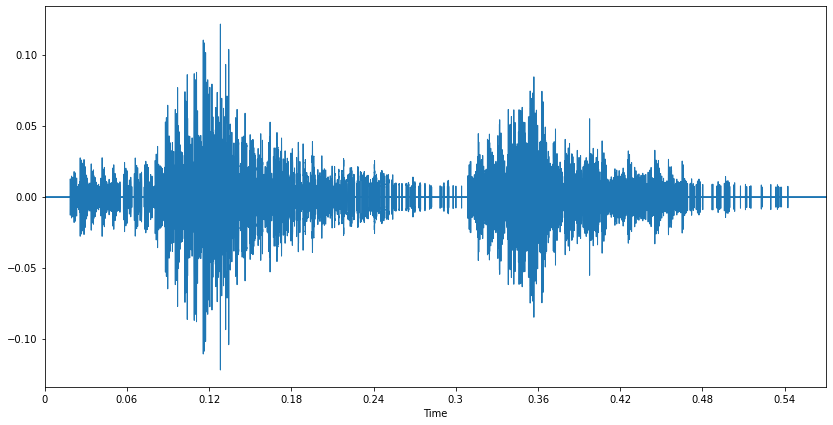

In [9]:
plt.figure(figsize=FIG_DIMENSION)
lrd.waveplot(template_data, sr=SAMPLING_RATE)

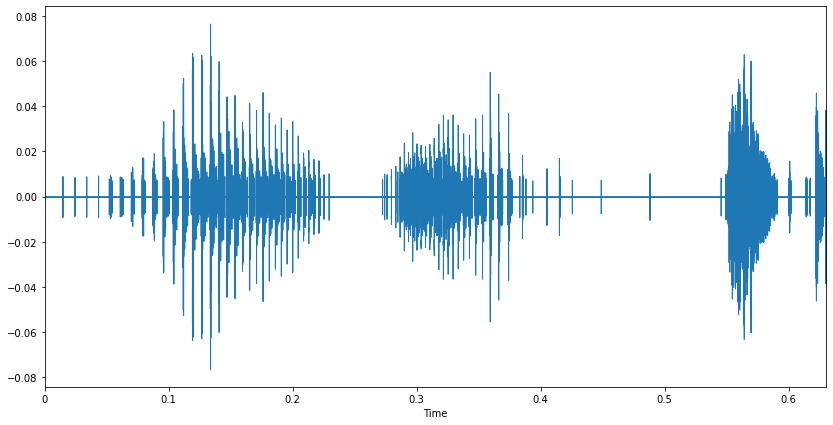

In [10]:
plt.figure(figsize=FIG_DIMENSION)
lrd.waveplot(target_data, sr=SAMPLING_RATE)

In [11]:
# Feature extraction #

In [12]:
from librosa.feature import mfcc, delta
import numpy as np
N_MFCC = 13

In [13]:
template_data = mfcc(y = template_data, sr = SAMPLING_RATE, n_mfcc = N_MFCC)
template_delta = delta(template_data)
template_delta2 = delta(template_data, order = 2)

target_data = mfcc(y = target_data, sr = SAMPLING_RATE, n_mfcc = N_MFCC)
target_delta = delta(target_data)
target_delta2 = delta(target_data, order = 2)

In [14]:
comprehensive_template = np.concatenate((template_data, template_delta, template_delta2), axis = 0)
comprehensive_target = np.concatenate((target_data, target_delta, target_delta2), axis = 0)

In [15]:
# Feature matching #

In [16]:
from fastdtw import fastdtw

In [17]:
distances = []
for i in range(N_MFCC * 3):
    distance, path = fastdtw(comprehensive_template[i], comprehensive_target[i])
    distances.append(distance)

In [18]:
print(np.mean(distances))

367.3098136551346


In [19]:
# Output interpretation #